In [1]:
# Dependencies
import requests
import json

import pandas as pd
from pandas_datareader import data
from pandas_datareader import wb

import numpy as np

import time
import datetime as dt
from datetime import datetime

import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

import mplfinance as mpf

# Gather

## Financial Data Collection

Using the pandas DataReader library to request data from Yahoo Finance for the Cryptocurrencies and Stock Exchange information that will be sampled.

**Note:**  
Bitcoin ticker symbol is BTC-USD  
Etheremum ticker symbol is ETH-USD  
Dogecoin ticker symbol is DOGE-USD  
Cardano ticker symbol is ADA-USD  
DOW JONES ticker symbol is ^DJI  
NASDAQ ticker symbol is ^IXIC  

In [2]:
#create a list of cryptocurrencies
crypto_list=["BTC-USD","ETH-USD","DOGE-USD","ADA-USD",]

#define date range
start_d = "2018-06-01"
end_d = "2020-06-30"

#create dataframe
crypto_list_df = data.DataReader(crypto_list, "yahoo", start_d,end_d)

#create a list of Dow Jones and NASDAQ
stock_indexes_list =["^DJI","^IXIC"]

#create dataframe
stock_indexes_list_df = data.DataReader(stock_indexes_list, "yahoo", start_d,end_d)



## Social Media Data Collection

Read in previously called Reddit Comment Data.

In [3]:
bitcoin_comment_times = pd.read_csv('output/comments_bitcoin.csv', index_col = 0)
ethereum_comment_times = pd.read_csv('output/comments_ethereum.csv', index_col= 0)
cardano_comment_times = pd.read_csv('output/comments_cardano.csv', index_col= 0)
dogecoin_comment_times = pd.read_csv('output/comments_dogecoin.csv', index_col= 0)
nasdaq_comment_times = pd.read_csv('output/comments_nasdaq.csv', index_col= 0)
dow_comment_times = pd.read_csv('output/comments_dow.csv', index_col= 0)

C:\Users\12164\anaconda3\envs\PythonData\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Clean

## Financial

### Crypto Highs, Lows, Volumes, and Daily Range

In [4]:
#create cryptocurrency daily high dataframe and save to csv
crypto_high = crypto_list_df.High.rename(columns={"BTC-USD": "Bitcoin High", "ETH-USD": "Ethereum High","DOGE-USD":"Dogecoin High", "ADA-USD":"Cardano High", "Symbols":"" })
crypto_high.to_csv("output/crypto_high.csv")

#multiple indexes making Date a series
crypto_high_no_date_index = crypto_high.reset_index()

#filter out daily low
crypto_low = crypto_list_df.Low.rename(columns={"BTC-USD": "Bitcoin Low", "ETH-USD": "Ethereum Low","DOGE-USD":"Dogecoin Low", "ADA-USD":"Cardano Low" })
crypto_low.to_csv("output/crypto_low.csv")

#multiple indexes making Date a series
crypto_low_no_date_index = crypto_low.reset_index()

#filter out daily volume
crypto_volume = crypto_list_df.Volume.rename(columns={"BTC-USD": "Bitcoin Volume", "ETH-USD": "Ethereum Volume","DOGE-USD":"Dogecoin Volume", "ADA-USD":"Cardano Volume" })
crypto_volume.to_csv("output/crypto_volume.csv")

#multiple indexes making Date a series
crypto_volume_no_date_index = crypto_volume.reset_index()

date_range = crypto_volume_no_date_index["Date"]

In [5]:
#read back in data with index columns set
crypto_volume = pd.read_csv("output/crypto_volume.csv", index_col= 0)
crypto_high = pd.read_csv("output/crypto_high.csv", index_col= 0)
crypto_low = pd.read_csv("output/crypto_low.csv", index_col= 0)

#calculate daily range from highs and lows
crypto_change = pd.merge(crypto_high, crypto_low, on = 'Date')
crypto_change['Bitcoin Difference'] = crypto_change['Bitcoin High'] - crypto_change['Bitcoin Low']
crypto_change['Ethereum Difference'] = crypto_change['Ethereum High'] - crypto_change['Ethereum Low']
crypto_change['Dogecoin Difference'] = crypto_change['Dogecoin High'] - crypto_change['Dogecoin Low']
crypto_change['Cardano Difference'] = crypto_change['Cardano High'] - crypto_change['Cardano Low']

### Stock High, Lows, Volumes, and Daily Range

In [6]:
#create stock daily high dataframe and save to csv
stock_indexes_list_high = stock_indexes_list_df.High.round(2).rename(columns={"^DJI": "Dow Jones High", "^IXIC":"NASDAQ High"})
stock_indexes_list_high.to_csv("output/stock_indexes_high.csv")

#create stock daily low dataframe and save to csv
stock_indexes_list_low = stock_indexes_list_df.Low.round(2).rename(columns={"^DJI": "Dow Jones Low", "^IXIC":"NASDAQ Low"})
stock_indexes_list_low.to_csv("output/stock_indexes_low.csv")

#create stock daily volume dataframe and save to csv
stock_indexes_list_volume = stock_indexes_list_df.Volume.rename(columns={"^DJI": "Dow Jones Volume", "^IXIC":"NASDAQ Volume"})
stock_indexes_list_volume.to_csv("output/stock_indexes_volume.csv")


In [7]:
#read back in data with index columns set
stock_indexes_list_volume = pd.read_csv("output/stock_indexes_volume.csv", index_col= 0)
stock_indexes_high = pd.read_csv("output/stock_indexes_high.csv", index_col= 0)
stock_indexes_low = pd.read_csv("output/stock_indexes_low.csv", index_col= 0)

#calculate daily range from highs and lows
stock_change = pd.merge(stock_indexes_high, stock_indexes_low, on = 'Date')
stock_change['Dow Jones Difference'] = stock_change['Dow Jones High'] - stock_change['Dow Jones Low']
stock_change['NASDAQ Difference'] = stock_change['NASDAQ High'] - stock_change['NASDAQ Low']

## Social

### Join separate calls into one dataframe, changing the Timestamp into a readable data

In [8]:
#read in data from separate CSVs
bitcoin_comment_times['Exchange']= 'Bitcoin'
ethereum_comment_times['Exchange']= 'Ethereum'
cardano_comment_times['Exchange']= 'Cardano'
dogecoin_comment_times['Exchange']= 'Dogecoin'
nasdaq_comment_times['Exchange']= 'NASDAQ'
dow_comment_times['Exchange']= 'Dow Jones'

#create one dataframe
reddit_comments = pd.concat([bitcoin_comment_times, ethereum_comment_times, cardano_comment_times, dogecoin_comment_times, nasdaq_comment_times, dow_comment_times], ignore_index= True, keys = ('Bitcoin', 'Ethereum', 'Cardano', 'Dogecoin', 'NASDAQ', 'Dow Jones'))

#change comment timestame to datetime object. Truncate to only date
reddit_comments['DateTime']= [datetime.fromtimestamp(i) for i in reddit_comments['Timestamp']]
reddit_comments['Date'] = reddit_comments['DateTime'].dt.date

#count comments by date
reddit_comments_clean = reddit_comments[['Date', 'SubReddit', 'Exchange']]
reddit_comment_count = pd.DataFrame(reddit_comments_clean.groupby(['Exchange', 'Date']).count()).reset_index().rename(columns= {'SubReddit': 'Comment Count'})

### Create variables for Comment Count, Volume, and Daily Range

#### Bitcoin

In [9]:
#identify volume by date
bit_volume = crypto_volume[['Bitcoin Volume']]
bit_volume.reset_index(inplace=True)

#identify daily range
bit_difference = crypto_change[['Bitcoin Difference']]
bit_difference.reset_index(inplace=True)

#count daily comments, convert date object to string
bit_comments = reddit_comment_count.loc[reddit_comment_count['Exchange']=='Bitcoin', ['Date', 'Comment Count']]
bit_comments.reset_index()
bit_comments['Date'] = [i.strftime("%Y-%m-%d") for i in bit_comments['Date']]

#combine into one dataframe of count, volume, and daily range
bit_vol_merged_df = pd.merge(bit_comments, bit_volume)
bit_merged_df = pd.merge(bit_vol_merged_df, bit_difference)

#values indexed by date
bit_count_merged = bit_merged_df['Comment Count']
bit_volume_merged = bit_merged_df['Bitcoin Volume']
bit_delta_merged = bit_merged_df['Bitcoin Difference']

#### Ethereum

In [10]:
# repeat process
ether_volume = crypto_volume[['Ethereum Volume']]
ether_volume.reset_index(inplace=True)

ether_difference = crypto_change[['Ethereum Difference']]
ether_difference.reset_index(inplace=True)

ether_comments = reddit_comment_count.loc[reddit_comment_count['Exchange']=='Ethereum', ['Date', 'Comment Count']]
ether_comments.reset_index()
ether_comments['Date'] = [i.strftime("%Y-%m-%d") for i in ether_comments['Date']]

ether_vol_merged_df = pd.merge(ether_comments, ether_volume)
ether_merged_df = pd.merge(ether_vol_merged_df, ether_difference)

ether_count_merged = ether_merged_df['Comment Count']
ether_volume_merged = ether_merged_df['Ethereum Volume']
ether_delta_merged = ether_merged_df['Ethereum Difference']

#### Cardano

In [11]:
# repeat process
card_volume = crypto_volume[['Cardano Volume']]
card_volume.reset_index(inplace=True)

card_difference = crypto_change[['Cardano Difference']]
card_difference.reset_index(inplace=True)

card_comments = reddit_comment_count.loc[reddit_comment_count['Exchange']=='Cardano', ['Date', 'Comment Count']]
card_comments.reset_index()
card_comments['Date'] = [i.strftime("%Y-%m-%d") for i in card_comments['Date']]

card_vol_merged_df = pd.merge(card_comments, card_volume)
card_merged_df = pd.merge(card_vol_merged_df, card_difference)

card_count_merged = card_merged_df['Comment Count']
card_volume_merged = card_merged_df['Cardano Volume']
card_delta_merged = card_merged_df['Cardano Difference']

#### Dogecoin

In [12]:
#repeat process
doge_volume = crypto_volume[['Dogecoin Volume']]
doge_volume.reset_index(inplace=True)

doge_difference = crypto_change[['Dogecoin Difference']]
doge_difference.reset_index(inplace=True)

doge_comments = reddit_comment_count.loc[reddit_comment_count['Exchange']=='Dogecoin', ['Date', 'Comment Count']]
doge_comments.reset_index()
doge_comments['Date'] = [i.strftime("%Y-%m-%d") for i in doge_comments['Date']]

doge_vol_merged_df = pd.merge(doge_comments, doge_volume)
doge_merged_df = pd.merge(doge_vol_merged_df, doge_difference)

doge_count_merged = doge_merged_df['Comment Count']
doge_volume_merged = doge_merged_df['Dogecoin Volume']
doge_delta_merged = doge_merged_df['Dogecoin Difference']

#### NASDAQ

In [13]:
#repeat process
nasdaq_volume = stock_indexes_list_volume[['NASDAQ Volume']]
nasdaq_volume.reset_index(inplace=True)

nasdaq_difference = stock_change[['NASDAQ Difference']]
nasdaq_difference.reset_index(inplace=True)

nasdaq_comments = reddit_comment_count.loc[reddit_comment_count['Exchange']=='NASDAQ', ['Date', 'Comment Count']]
nasdaq_comments.reset_index()
nasdaq_comments['Date'] = [i.strftime("%Y-%m-%d") for i in nasdaq_comments['Date']]


nasdaq_vol_merged_df = pd.merge(nasdaq_comments, nasdaq_volume)
nasdaq_merged_df = pd.merge(nasdaq_vol_merged_df, nasdaq_difference)

nasdaq_count_merged = nasdaq_merged_df['Comment Count']
nasdaq_volume_merged = nasdaq_merged_df['NASDAQ Volume']
nasdaq_delta_merged = nasdaq_merged_df['NASDAQ Difference']

In [14]:
#### Dow Jones

In [15]:
#repeat process
dow_volume = stock_indexes_list_volume[['Dow Jones Volume']]
dow_volume.reset_index(inplace=True)

dow_difference = stock_change[['Dow Jones Difference']]
dow_difference.reset_index(inplace=True)

dow_comments = reddit_comment_count.loc[reddit_comment_count['Exchange']=='Dow Jones', ['Date', 'Comment Count']]
dow_comments.reset_index()
dow_comments['Date'] = [i.strftime("%Y-%m-%d") for i in dow_comments['Date']]


dow_vol_merged_df = pd.merge(dow_comments, dow_volume)
dow_merged_df = pd.merge(dow_vol_merged_df, dow_difference)

dow_count_merged = dow_merged_df['Comment Count']
dow_volume_merged = dow_merged_df['Dow Jones Volume']
dow_delta_merged = dow_merged_df['Dow Jones Difference']

# Plot

## Exploratory Plots

### Cryptocurrency Daily Volume Over Time

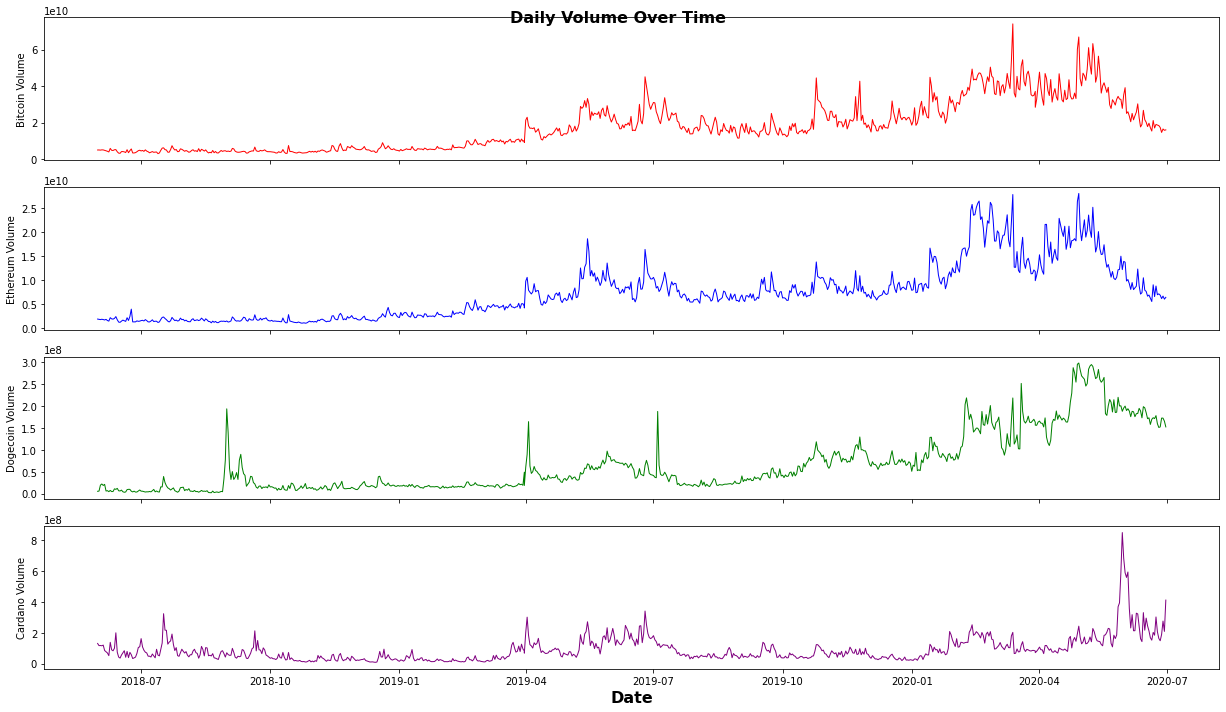

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(17,10))
fig.suptitle("Daily Volume Over Time", fontsize=16, fontweight="bold")

ax1.plot(date_range, crypto_volume["Bitcoin Volume"], linewidth=1, color ="red")
ax1.set_ylabel("Bitcoin Volume")

ax2.plot(date_range, crypto_volume["Ethereum Volume"], linewidth=1, color ="blue")
ax2.set_ylabel("Ethereum Volume")

ax3.plot(date_range, crypto_volume["Dogecoin Volume"], linewidth=1,color ="green")
ax3.set_ylabel("Dogecoin Volume")

ax4.plot(date_range, crypto_volume["Cardano Volume"], linewidth=1, color ="purple")
ax4.set_ylabel("Cardano Volume")
ax4.set_xlabel("Date", fontsize=16, fontweight="bold")

#save plot
plt.savefig("output/crypto_volume.png")

plt.tight_layout()
plt.show()

### Takeaways

The general curve of each cryptocurrency tend to track each other, at different magnitudes.  Increasing activity around February of 2020.

### Dow Jones Daily Change in Price with Daily Volume

In [17]:
#define colors for candles
change_color = mpf.make_marketcolors(up ="green", down="red")
market_style = mpf.make_mpf_style(marketcolors = change_color)

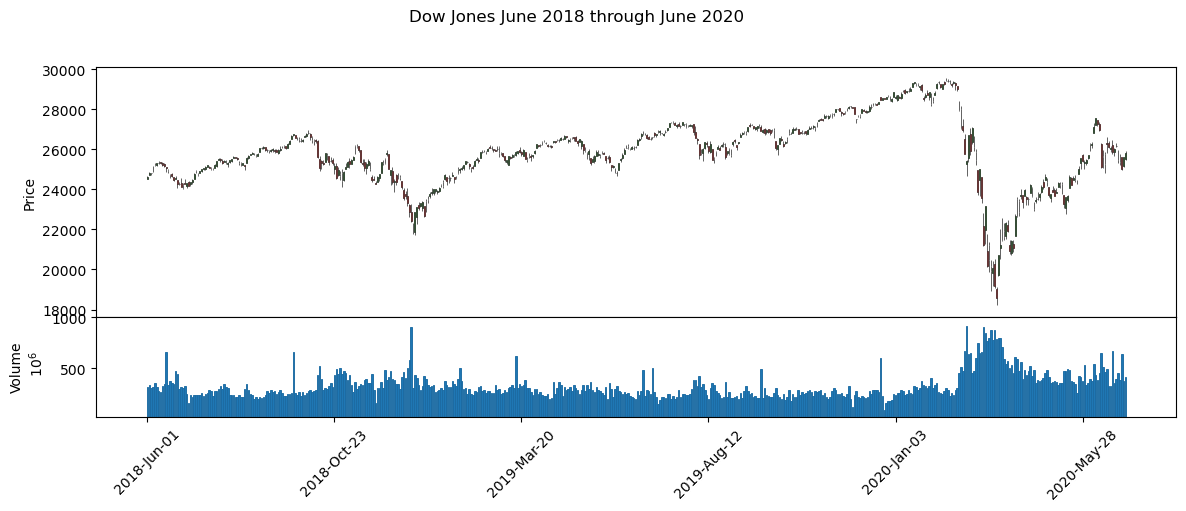

In [18]:
#Dow Jones price and volume june 2018 -june 2020
dow_june20 =data.DataReader("^DJI", "yahoo", "2018-06-01","2020-06-30")

#plot
dow_june20_plot = mpf.plot(dow_june20, type='candle', title='Dow Jones June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5))

#save plot
dow_june20_plot = mpf.plot(dow_june20, type='candle', title='Dow Jones June 2018 through June 2020',ylabel='Price', ylabel_lower='Volume',volume=True, style = market_style,figsize=(15,5), savefig = ("output/dow_june2018-2020.png"))

### Takeaways

Increased volume of transactions could mean an increase or decrease in price. It was not going to be fruitfull to try to find a correlations unless looking at a narrow timeframe.

## Analysis Plots

### Relationship between Dow Jones Closing Price and Bitcoin Close Price

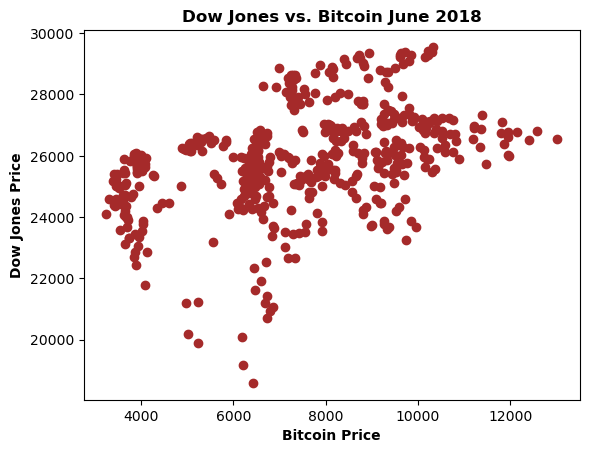

The correlation between Bitcoin and the Dow Jones in June 1, 2018 to June 30, 2020 is 0.4108021813174202


<Figure size 640x480 with 0 Axes>

In [19]:
#create a list bitcoin close price only
correlation_list =["BTC-USD"]
bitcoin_df = data.DataReader("BTC-USD", "yahoo", "2018-06-01","2020-06-30")
bitcoin_correlation_df = bitcoin_df.Close.round(2).rename({"BTC-USD":"Bitcoin Close Price"})

#create a list dow jones close price only
dow_df = data.DataReader("^DJI", "yahoo", "2018-06-01","2020-06-30")
dow_correlation_df = dow_df.Close.round(2).rename({"^DJI":"Dow Jones Close Price"})
merged_correlation_df = pd.merge(bitcoin_correlation_df, dow_correlation_df, on='Date')

#create dataframe of only values with shared dates
clean_correlation_close = merged_correlation_df.rename(columns={"Close_x": "Bitcoin Close Price", "Close_y": "Dow Jones Close Price"})

#determine axis
xaxis = clean_correlation_close["Bitcoin Close Price"]
yaxis = clean_correlation_close["Dow Jones Close Price"]

#plot
plt.scatter(xaxis, yaxis, facecolor= "brown")

#label
plt.xlabel("Bitcoin Price",fontweight="bold")
plt.ylabel("Dow Jones Price",fontweight="bold")
plt.title("Dow Jones vs. Bitcoin June 2018",fontweight="bold")

#save
plt.savefig("output/dow_vs_bitcoin.png")

#display
plt.show()
plt.tight_layout()

#calculate correlation
correlation = st.pearsonr(xaxis,yaxis)

#Print
print(f"The correlation between Bitcoin and the Dow Jones in June 1, 2018 to June 30, 2020 is {correlation[0]}")

### Takeaways

There does seem to be a slight correlation. Weak correlation confirmed with statistical analysis.

### Relationship between Bitcoin Reddit Daily Comment Count and Daily Volume

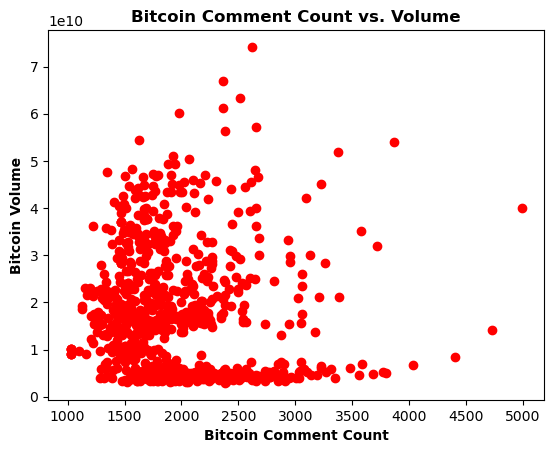

In [20]:
#plot
plt.scatter(bit_count_merged, bit_volume_merged,color ="red")

#label
plt.xlabel("Bitcoin Comment Count",fontweight="bold")
plt.ylabel("Bitcoin Volume",fontweight="bold")
plt.title("Bitcoin Comment Count vs. Volume",fontweight="bold")

#save
plt.savefig("output/bitcoin_scatter_volume.png")

#display
plt.show()

### Relationship between Bitcoin Reddit Daily Comment Count and Daily Price Range

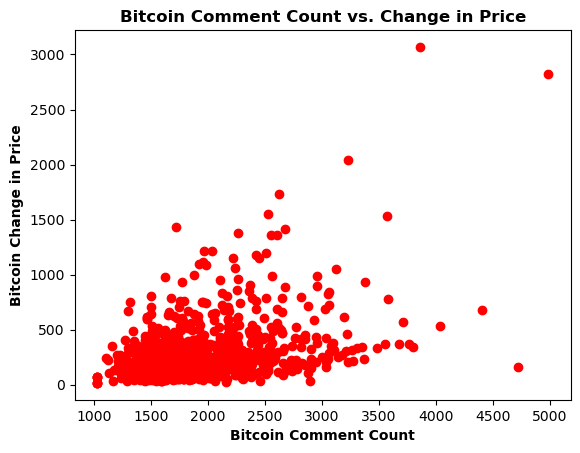

In [21]:
#plot
plt.scatter(bit_count_merged, bit_delta_merged,color ="red")

#label
plt.xlabel("Bitcoin Comment Count",fontweight="bold")
plt.ylabel("Bitcoin Change in Price",fontweight="bold")
plt.title("Bitcoin Comment Count vs. Change in Price",fontweight="bold")

#save
plt.savefig("output/bitcoin_scatter.png")

#display
plt.show()

### Takeaways

Stronger trend with the change in price, confirmed with analysis.

### Relationship between Dow Jones Reddit Daily Comment Count and Daily Volume

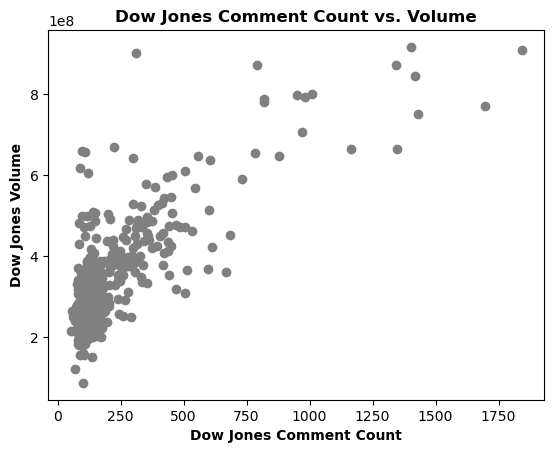

In [22]:
#plot
plt.scatter(dow_count_merged, dow_volume_merged,color ="gray")

#label
plt.xlabel("Dow Jones Comment Count",fontweight="bold")
plt.ylabel("Dow Jones Volume",fontweight="bold")
plt.title("Dow Jones Comment Count vs. Volume",fontweight="bold")

#save
plt.savefig("output/dow_scatter_volume.png")

#display
plt.show()

### Relationship between Dow Jones Reddit Daily Comment Count and Daily Price Range

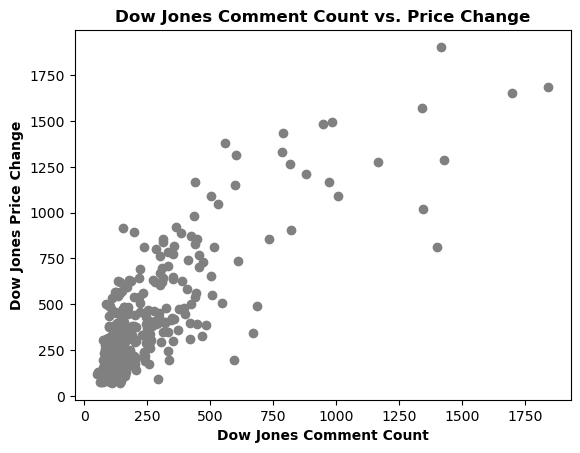

In [23]:
#plot
plt.scatter(dow_count_merged, dow_delta_merged, color ="gray")

#label
plt.xlabel("Dow Jones Comment Count",fontweight="bold")
plt.ylabel("Dow Jones Price Change",fontweight="bold")
plt.title("Dow Jones Comment Count vs. Price Change",fontweight="bold")

#save
plt.savefig("output/dow_scatter.png")

#display
plt.show()

### Takeaways

Decent correlation between comment count and both metrics. Stronger trend with the change in price, confirmed with analysis.

### Bitcoin Reddit Daily Comment Count and Daily Price Range Over Time

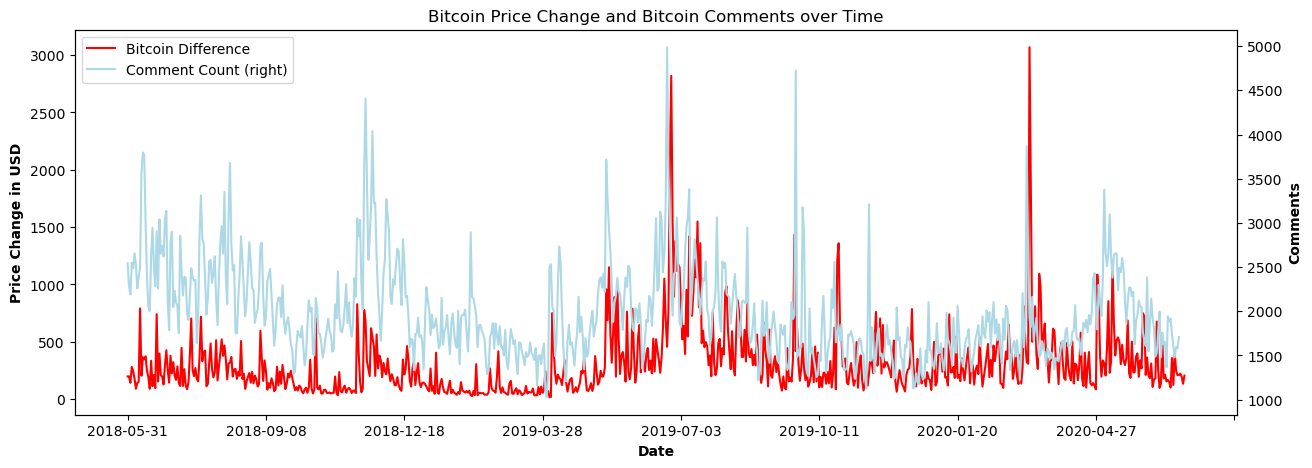

In [24]:
#plot price change
bitcoin_comment_vs_price = crypto_change[['Bitcoin Difference']].plot(color = 'red')

#add comment values
bit_comments.plot(ax = bitcoin_comment_vs_price, secondary_y = True,figsize=(15,5),title = "Bitcoin Price Change and Bitcoin Comments over Time", color = 'lightblue').set_ylabel("Comments",fontweight="bold")

#label
bitcoin_comment_vs_price.set_xlabel("Date",fontweight="bold")
bitcoin_comment_vs_price.set_ylabel("Price Change in USD",fontweight="bold")

#save
plt.savefig("output/bitcoin_price_change_and_comments.png")

#display
plt.show()

### Takeaways

Able to visually see the relationship of activity across the timeframe

### Dow Jones Reddit Daily Comment Count and Daily Price Range Over Time

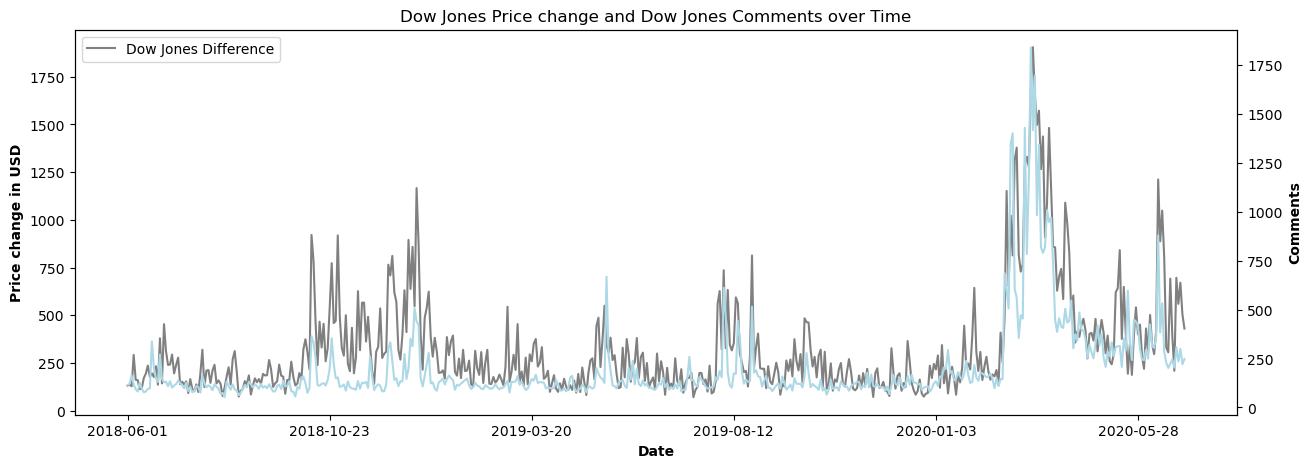

In [25]:
#plot price change
dow_comment_vs_price_change = stock_change[['Dow Jones Difference']].plot(color = 'grey')

#add comment values
dow_merged_df['Comment Count'].plot(ax = dow_comment_vs_price_change, secondary_y = True,figsize=(15,5),title = "Dow Jones Price change and Dow Jones Comments over Time", color= 'lightblue').set_ylabel("Comments",fontweight="bold")

#label
dow_comment_vs_price_change.set_xlabel("Date",fontweight="bold")
dow_comment_vs_price_change.set_ylabel("Price change in USD",fontweight="bold")
dow_comment_vs_price_change.legend()

#save
plt.savefig("output/dow_price_change_and_comments.png")

#display
plt.show()

### Takeaways

Able to visually see the relationship of close activity across the timeframe

### Stock Exhange Volume Over Time

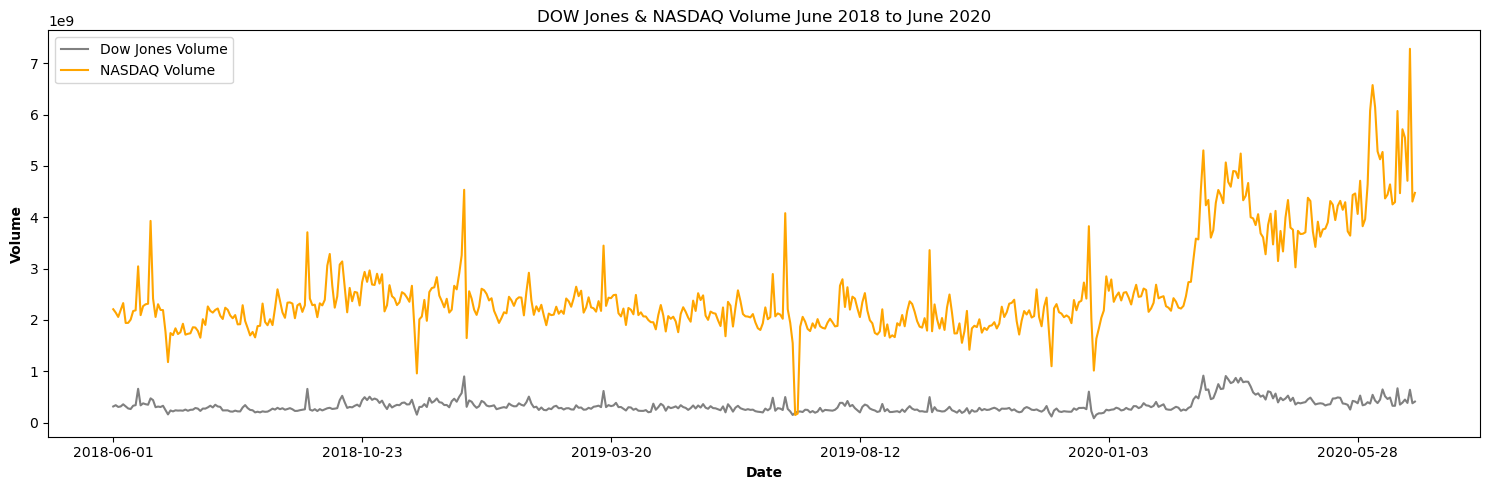

In [26]:
#plot
colors = ('grey', 'orange')
two_yr_stock_indexes_volume = stock_indexes_list_volume[["Dow Jones Volume","NASDAQ Volume"]].plot(figsize=(15,5),title = "DOW Jones & NASDAQ Volume June 2018 to June 2020", color= colors)

#label
two_yr_stock_indexes_volume.set_xlabel("Date",fontweight="bold")
two_yr_stock_indexes_volume.set_ylabel("Volume",fontweight="bold")

#save
plt.savefig("output/june2018_thru_june202_socke_indexes_volume.png")

#display
two_yr_stock_indexes_volume
plt.tight_layout()

### Takeaways

NASDAQ has a typically higher volume of transactions per day than Dow Jones.  
Less activity combined with a comparatively high number of comments in general may lead to the closer correlation found with Dow Jones.

# Analyze

## Calculate correlations

In [27]:
#bitcoin comments to volume and to daily price range
bit_volume_correlation = st.pearsonr(bit_count_merged, bit_volume_merged)
bit_delta_correlation = st.pearsonr(bit_count_merged, bit_delta_merged)

#ethereum comments to volume and to daily price range
ether_volume_correlation = st.pearsonr(ether_count_merged, ether_volume_merged)
ether_delta_correlation = st.pearsonr(ether_count_merged, ether_delta_merged)

#cardano comments to volume and to daily price range
card_volume_correlation = st.pearsonr(card_count_merged, card_volume_merged)
card_delta_correlation = st.pearsonr(card_count_merged, card_delta_merged)

#dogecoin comments to volume and to daily price range
doge_volume_correlation = st.pearsonr(doge_count_merged, doge_volume_merged)
doge_delta_correlation = st.pearsonr(doge_count_merged, doge_delta_merged)

#nasdaq comments to volume and to daily price range
nasdaq_volume_correlation = st.pearsonr(nasdaq_count_merged, nasdaq_volume_merged)
nasdaq_delta_correlation = st.pearsonr(nasdaq_count_merged, nasdaq_delta_merged)

#dow jones comments to volume and to daily price range
dow_volume_correlation = st.pearsonr(dow_count_merged, dow_volume_merged)
dow_delta_correlation = st.pearsonr(dow_count_merged, dow_delta_merged)

#between dow and bitcoin close dates
correlation = st.pearsonr(xaxis,yaxis)

#display
print(f'''
Correlations between the time period of June 1, 2018 to June 30, 2020 are:

Bitcoin     Reddit Comments to Daily Volume      is {bit_volume_correlation[0]}. 
                            to Daily Price Range is  {bit_delta_correlation[0]}.

Ethereum    Reddit Comments to Daily Volume      is {ether_volume_correlation[0]}. 
                            to Daily Price Range is  {ether_delta_correlation[0]}.

Cardano     Reddit Comments to Daily Volume      is  {card_volume_correlation[0]}. 
                            to Daily Price Range is  {card_delta_correlation[0]}.     

Dogecoin    Reddit Comments to Daily Volume      is {doge_volume_correlation[0]}. 
                            to Daily Price Range is  {doge_delta_correlation[0]}.       

NASDAQ      Reddit Comments to Daily Volume      is  {nasdaq_volume_correlation[0]}. 
                            to Daily Price Range is  {nasdaq_delta_correlation[0]}.     

Dow Jones   Reddit Comments to Daily Volume      is  {dow_volume_correlation[0]}. 
                            to Daily Price Range is  {dow_delta_correlation[0]}.

Bitcoin Close Price to Dow Jones Close Price     is  {correlation[0]}.
''')


Correlations between the time period of June 1, 2018 to June 30, 2020 are:

Bitcoin     Reddit Comments to Daily Volume      is -0.07526784765363906. 
                            to Daily Price Range is  0.3839140636010183.

Ethereum    Reddit Comments to Daily Volume      is -0.4088386880987925. 
                            to Daily Price Range is  0.3928748907201369.

Cardano     Reddit Comments to Daily Volume      is  0.28517318862077634. 
                            to Daily Price Range is  0.2613143933181164.     

Dogecoin    Reddit Comments to Daily Volume      is -0.16291213768512133. 
                            to Daily Price Range is  0.4561820556493209.       

NASDAQ      Reddit Comments to Daily Volume      is  0.7394253806748537. 
                            to Daily Price Range is  0.4263275477851225.     

Dow Jones   Reddit Comments to Daily Volume      is  0.7775113642547149. 
                            to Daily Price Range is  0.8208300478702695.

Bitcoin Close P